# Chapter 8
## Hopfield networks

    Hand-in bug-free (try "Kernel" > "Restart & Run All") and including all (textual as well as figural) output via Blackboard before the deadline (see Blackboard).

Learning goals:
1. Get familiar with energy functions and with updating Hopfield networks by hand
1. Implement a Hopfield network that fulfills a constraint
1. Implement, train and test a Hopfield network on images

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import urllib2
import scipy.misc as sp
import skimage as ski

### Exercise 1: Flip-flop  (2 points)
Consider a Hopfield network consisting of two variables $x_1$ and $x_2$ with thresholds $\theta_1 = 0.5$ and $\theta_2 = 0.5$, and a weight $w_{ij} = -1$. This network implements a so-called flip-flop. 
1. What is the energy function of this network? *(Write down the standard form of $E(\mathbf{x})$, insert the values and simplify it.)*
1. What are the possible energy levels of this network? *(Given the possible state combinations for $x_1$ and $x_2$ in a Hopfield network, which values can $E(\mathbf{x})$ have?)*
1. What are the stable states of this network?

### Solution 1
1. 
$E(x) = - \frac{1}{2} * \sum\limits_{i,j} w_{ij} * x_i * x_j - \sum\limits_{i}\theta_i * x_i\\
= - \frac{1}{2} * (0 * x_1 * x_1 + -1 * x_1 * x_2 + -1 * x_2 * x_1 + 0 * x_2 * x_2) - 0.5 * x_1 + 0.5 * x_2\\
= x_1x_2  - \frac{1}{2}x_1 -\frac{1}{2}x_2$     

1. 
$E(x_1 = 0, x_2 = 0) = 0\\
E(x_1 = 1, x_2 = 0) = -\frac{1}{2}\\
E(x_1 = 0, x_2 = 1) = -\frac{1}{2}\\
E(x_1 = 1, x_2 = 1) = 0\\
$

1. Stable states are the states with a local minimum, so that would be:
$E(x_1 = 0, x_2 = 1)$
and
$E(x_1 = 1, x_2 = 0)$

### Exercise 2: Hopfield net
Consider a Hopfield network with weights
\begin{equation}
\mathbf{W} =
\left[
\begin{array}{llll}
0 & -0.2 & -0.4 & 0\\
-0.2 & 0 & 0.5 & 0.3\\
-0.4 & 0.5 & 0 & 0.8\\
0 & 0.3 & 0.8 & 0
\end{array}
\right]
\end{equation}
and biases
$\boldsymbol{\theta} = (-0.5,-0.3,-0.8,0.2)$.
1. What is the state of the Hopfield network after one sequential update of the first, second, third and fourth node when we start at the initial node state $\mathbf{x} = (0,1,1,1)$? 
1. What do you conclude from your observation?

### Solution 2  (1 point)
1. The state of the Hopfield network after one sequential update is the same as the original state, namely: $\mathbf{x} = (0,1,1,1)$.

1. Therefore, we conclude that this is a stable state of this Hopfield Network.

### Exercise 3 : A Hopfield network that fulfills a constraint (2 points)

In this exercise you will run a Hopfield model that converges to a state that fulfills a constraint. 

1. Implement a function `optimize(n)` which returns a length `n` vector of node states. The constraint it should solve is that all nodes should be set to `0`, except for a single random node set to `1`.
1. Show that your function works for different values of `n`.

Start from random node states. Choose and implement the necessary weights and biases manually (i.e. you do not train the Hopfield network here). The resulting vector should be the configuration of the network when it has converged to a stable state. Make sure that your implementation fulfills all requirements for Hopfield networks to converge to stable states.

### Solution 3

In [4]:
# The optimization function
import random
def optimize(n):
    states = create_array(n)
    for i in range(0,n):
        states[i] = update_array(states,i)
    return states
    

def create_array(n):
#Create random array of zeroes and ones
    states = []
    for i in range(0,n):
        states.append(random.randint(0,1))
    return states
        
def update_array(states,index):
#Sum over the weights
    sum = 0
    for i in range(0,len(states)):
        if(i !=  index):
            sum += -2*states[i]
#bias = 1
    sum += 1
    if(sum >= 0):
        return 1
    return 0
    
        
    



In [5]:
# Print solutions
for i in range(1,10):
    print(optimize(i))


[1]
[0, 1]
[0, 0, 1]
[0, 0, 0, 1]
[0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0]


### Training a Hopfield network on given patterns

You will now implement a Hopfield network that learns to reconstruct given images. Here you can *a) ignore the bias term*; and *b) use bipolar nodes*. 

The next cells load an image, resize it and store it together with a mirrored version of the same image in the variables `x1` and `x2`, which will be stacked in the training data `X`. These are your *input patterns*. 

In [6]:
# The source image
f = urllib2.urlopen("https://homepages.cae.wisc.edu/~ece533/images/watch.png")
# Read the image
x1 = mpimg.imread(f)

# Make binary
x1 = np.mean(sp.imresize(x1,10),2)
x1[x1 < np.mean(x1.flatten())] = -1 # Black
x1[x1 >= np.mean(x1.flatten())] = 1 # White
x1.astype("int32")

# Make duplicate but mirrored second image
x2 = np.fliplr(x1)

# Flatten images
sz = x1.shape
X = np.stack((x1.flatten(), x2.flatten()), axis=1)
print(x1.shape)
print(x2.shape)

(76L, 102L)
(76L, 102L)


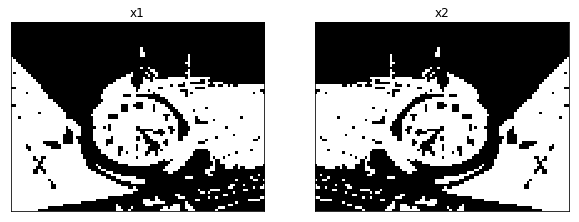

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0].set_xticks([], [])
ax[0].set_yticks([], [])
ax[0].set_title("x1")

ax[1].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1].set_xticks([], [])
ax[1].set_yticks([], [])
ax[1].set_title("x2")

### Exercise 4: Hopfield training  (1 point)
Write a function `hopfield_train(X)` which takes the $n$ *input patterns* `X` (shape $(m,n)$) as argument and returns the weight matrix `w` for a trained Hopfield network with $m$ nodes. Initialize the weights with zeros and then implement the learning rule for the weights. Again, make sure that your network fulfills the requirements for Hopfield network convergence. 

Note that you can write the weight update term per *input pattern* in a single line using the dot product. 

### Solution 4

In [31]:
# Hopfield training
def hopfield_train(X):
    m, n = X.shape
    # Initialize weights
    w = np.zeros((m,m))
    # Hebbian learning
    for i in range(0,n):
#         for i in range(0,m):
#             for h in range(0,m):
#                 w[i,h] += X[i,j]*X[h,j]
        w += np.outer(X[:,i],X[:,i])
    # Avoid self-connections (diagonal)
    for i in range(m):
        w[i,i] = 0
    return w
# X = np.matrix([[-1,1],[1,-1], [1,-1]])
# w = hopfield_train(X)
# print(w)

### Exercise 5  (1 points)
Write a function `hopfield_test(X, w, n_epochs)` which takes the $n$ initial states `Y` (shape $(m,n)$) and the learned weights `w` and updates all units in random order for `n_epochs` times (i.e., which "runs" your trained Hopfield network for `n_epochs` rounds). The return value should be the updated states `Y` of the Hopfield network. Make sure that your iteration fulfills the requirements for Hopfield network convergence.

### Solution 5

In [32]:
# Hopfield testing
def hopfield_test(X, w, n_epochs=10):
#    m,n = X.shape
#    Y = np.zeros((m,n))
    # Loop over epochs
#    for i in range(0,n_epochs):
        # Loop over examples
#        for j in range(0,n):
            # Loop over nodes
#                for k in range(0,m):
#                 Update node(bias = 0)
#                    for l in range(0,m):
#                        Y[k,j] += X[k,j]*w[l,k]
            
#                    if(Y[k,j] >= 0):
#                        Y[k] = 1
#                    else:
#                        Y[k] = -1
    Y = np.dot(w,Xhat)
    return Y
# X = np.matrix([[-1,1],[1,1], [-1,-1]])
# w = hopfield_train(X)
# print(hopfield_test(X,w))

### Exercise 6  (1 points)
Train your hopfield network on the two *input patterns* in `X` and save the weights. 

### Solution 6

In [33]:
# Run hopfield training
w = hopfield_train(X)
print(w)

[[ 0.  2.  2. ...,  0.  0.  0.]
 [ 2.  0.  2. ...,  0.  0.  0.]
 [ 2.  2.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  2.  2.]
 [ 0.  0.  0. ...,  2.  0.  2.]
 [ 0.  0.  0. ...,  2.  2.  0.]]


### Exercise 7 (2 points)

Test whether your trained Hopfield net can reconstruct the original images when starting from different degrees of corruption (which means randomly changing the pattern's node states). Make use of the function `corrupt_images` for this. 

1. Choose 4 degrees of corruption (between min: 10%, max: 100%) you want to test. Corrupt the original input images in `X` accordingly.  
1. Run your trained Hopfield network with the corrupted images as input. It may not need to run for long time. 
1. For both patterns show the original, the corrupted and the reconstructed images next to each other. 
1. For each of the degrees of corruption, comment on what you see. 

In [34]:
def corrupt_images(X, percentage=25):
    Xhat = X.copy()
    n_pixels = int(X.shape[0]*percentage/100)
    for i_example in range(X.shape[1]):
        idx = np.random.permutation(X.shape[0])[:n_pixels]
        Xhat[idx, i_example] = 2 * np.random.randint(0, 2, n_pixels) - 1
    return Xhat

### Solution 7

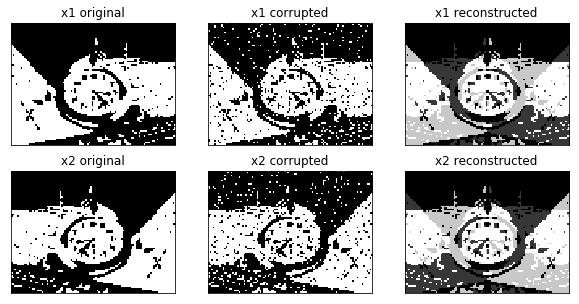

In [85]:
# Corrupt images
Xhat = corrupt_images(X,10)

# Test associative memory properties
Xnew = hopfield_test(Xhat,w)

# Plot results
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

ax[0][0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0][0].set_xticks([], [])
ax[0][0].set_yticks([], [])
ax[0][0].set_title("x1 original")

ax[0][1].imshow(Xhat[:, 0].reshape(sz), cmap="gray")
ax[0][1].set_xticks([], [])
ax[0][1].set_yticks([], [])
ax[0][1].set_title("x1 corrupted")

ax[0][2].imshow(Xnew[:, 0].reshape(sz), cmap="gray")
ax[0][2].set_xticks([], [])
ax[0][2].set_yticks([], [])
ax[0][2].set_title("x1 reconstructed")

ax[1][0].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1][0].set_xticks([], [])
ax[1][0].set_yticks([], [])
ax[1][0].set_title("x2 original")

ax[1][1].imshow(Xhat[:, 1].reshape(sz), cmap="gray")
ax[1][1].set_xticks([], [])
ax[1][1].set_yticks([], [])
ax[1][1].set_title("x2 corrupted")

ax[1][2].imshow(Xnew[:, 1].reshape(sz), cmap="gray")
ax[1][2].set_xticks([], [])
ax[1][2].set_yticks([], [])
ax[1][2].set_title("x2 reconstructed")




Instead of only black and white values we see grey as well. The reconstructed images are nearly if not entirely equal to each other's mirror image. The reconstruction seems to be a superimposition of the two original images where the matching original image (x2 original for x2 reconstructed) has the "upper hand" so to speak.

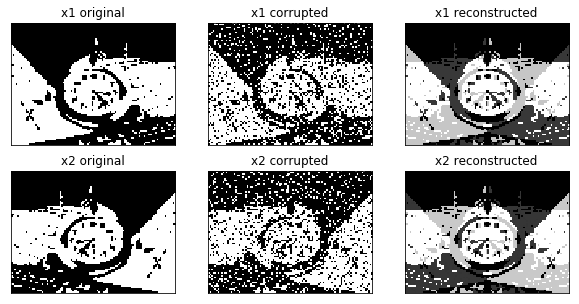

In [70]:
# # Corrupt images
Xhat = corrupt_images(X,25)
# # Test associative memory properties
Xnew = hopfield_test(Xhat,w)

# Plot results
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

ax[0][0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0][0].set_xticks([], [])
ax[0][0].set_yticks([], [])
ax[0][0].set_title("x1 original")

ax[0][1].imshow(Xhat[:, 0].reshape(sz), cmap="gray")
ax[0][1].set_xticks([], [])
ax[0][1].set_yticks([], [])
ax[0][1].set_title("x1 corrupted")

ax[0][2].imshow(Xnew[:, 0].reshape(sz), cmap="gray")
ax[0][2].set_xticks([], [])
ax[0][2].set_yticks([], [])
ax[0][2].set_title("x1 reconstructed")

ax[1][0].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1][0].set_xticks([], [])
ax[1][0].set_yticks([], [])
ax[1][0].set_title("x2 original")

ax[1][1].imshow(Xhat[:, 1].reshape(sz), cmap="gray")
ax[1][1].set_xticks([], [])
ax[1][1].set_yticks([], [])
ax[1][1].set_title("x2 corrupted")

ax[1][2].imshow(Xnew[:, 1].reshape(sz), cmap="gray")
ax[1][2].set_xticks([], [])
ax[1][2].set_yticks([], [])
ax[1][2].set_title("x2 reconstructed")

There is more corruption here yet the reconstructions seem identical to the ones where the corruption was lower (see above).

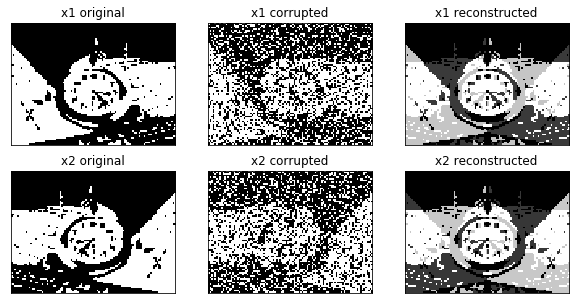

In [84]:
# # Corrupt images
Xhat = corrupt_images(X,50)
# # Test associative memory properties
Xnew = hopfield_test(Xhat,w)

# Plot results
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

ax[0][0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0][0].set_xticks([], [])
ax[0][0].set_yticks([], [])
ax[0][0].set_title("x1 original")

ax[0][1].imshow(Xhat[:, 0].reshape(sz), cmap="gray")
ax[0][1].set_xticks([], [])
ax[0][1].set_yticks([], [])
ax[0][1].set_title("x1 corrupted")

ax[0][2].imshow(Xnew[:, 0].reshape(sz), cmap="gray")
ax[0][2].set_xticks([], [])
ax[0][2].set_yticks([], [])
ax[0][2].set_title("x1 reconstructed")

ax[1][0].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1][0].set_xticks([], [])
ax[1][0].set_yticks([], [])
ax[1][0].set_title("x2 original")

ax[1][1].imshow(Xhat[:, 1].reshape(sz), cmap="gray")
ax[1][1].set_xticks([], [])
ax[1][1].set_yticks([], [])
ax[1][1].set_title("x2 corrupted")

ax[1][2].imshow(Xnew[:, 1].reshape(sz), cmap="gray")
ax[1][2].set_xticks([], [])
ax[1][2].set_yticks([], [])
ax[1][2].set_title("x2 reconstructed")

There is even more corruption than before here yet the reconstructions seem identical to the ones where the corruption was lower (see above)

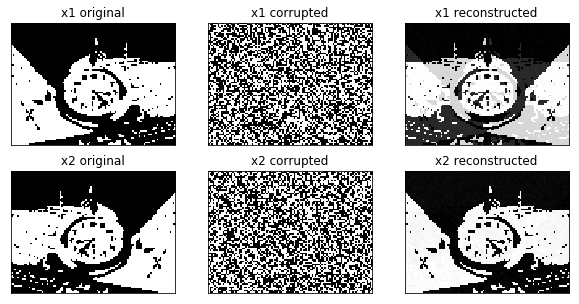

In [82]:
# # Corrupt images
Xhat = corrupt_images(X,100)
# # Test associative memory properties
Xnew = hopfield_test(Xhat,w)

# Plot results
fig, ax = plt.subplots(2, 3, figsize=(10, 5))

ax[0][0].imshow(X[:, 0].reshape(sz), cmap="gray")
ax[0][0].set_xticks([], [])
ax[0][0].set_yticks([], [])
ax[0][0].set_title("x1 original")

ax[0][1].imshow(Xhat[:, 0].reshape(sz), cmap="gray")
ax[0][1].set_xticks([], [])
ax[0][1].set_yticks([], [])
ax[0][1].set_title("x1 corrupted")

ax[0][2].imshow(Xnew[:, 0].reshape(sz), cmap="gray")
ax[0][2].set_xticks([], [])
ax[0][2].set_yticks([], [])
ax[0][2].set_title("x1 reconstructed")

ax[1][0].imshow(X[:, 1].reshape(sz), cmap="gray")
ax[1][0].set_xticks([], [])
ax[1][0].set_yticks([], [])
ax[1][0].set_title("x2 original")

ax[1][1].imshow(Xhat[:, 1].reshape(sz), cmap="gray")
ax[1][1].set_xticks([], [])
ax[1][1].set_yticks([], [])
ax[1][1].set_title("x2 corrupted")

ax[1][2].imshow(Xnew[:, 1].reshape(sz), cmap="gray")
ax[1][2].set_xticks([], [])
ax[1][2].set_yticks([], [])
ax[1][2].set_title("x2 reconstructed")

With extreme corruption the reconstructions are finally not each other's mirror image. Each iteration sees completely different reconstructions. Sometimes it seems like the reconstructions are both original images superimposed on each other with the colours inversed. Other times its just the mirror image of its original with its colours reversed or just the superimposition of the images without the colours reversed. Or a superimposition where one image does have inversed colours and the other doesn't. Very rarely, the reconstruction is a perfect match with the original image.